# 2. Twitter Sentiment Analysis: Training The data Without Augmentation

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [3]:
df= pd.read_csv("train.csv")

In [4]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
df.shape

(31962, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
df.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

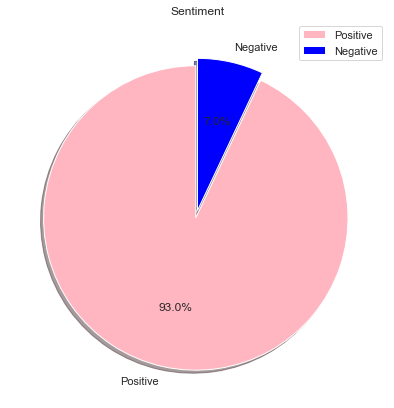

In [10]:
sns.set(style="whitegrid")
labels = ['Positive', 'Negative']
sizes = df['label'].value_counts(sort = True)

colors = ["lightpink","blue"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Sentiment')
plt.legend()
plt.show()

In [21]:
df.drop("id",axis=1,inplace= True)

In [22]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [23]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [24]:
df.head()

,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation


In [25]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

<ipython-input-25-9ce3b175e823>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")


,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide society now #motivation


In [26]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
pip install tensorflow

In [16]:
def clean_documents(document):
  stop = stopwords.words('english')
  tokens = word_tokenize(document.lower())

  word_tokens = [token for token in tokens if token.isalpha()]
  clean_tokens = [token for token in word_tokens if token not in stop]

  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in clean_tokens]

  return " ".join(lemmatized_tokens)

In [17]:
df["clean_tweet"] = df["clean_tweet"].apply(clean_documents)

In [18]:
df.head()

,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model love u take u time ur
4,0,factsguide: society now #motivation,factsguide society motivation


In [19]:
X=df.clean_tweet
y=df.label

In [20]:
X.head()

0    father dysfunctional selfish drag kid dysfunct...
1    thanks lyft credit use cause offer wheelchair ...
2                                       bihday majesty
3                          model love u take u time ur
4                        factsguide society motivation
Name: clean_tweet, dtype: object

In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

## Ml Model

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
# CountVectorizer
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [24]:
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [25]:
rfc = RandomForestClassifier()
rfc.fit(X_train_cv, y_train) 

RandomForestClassifier()

In [26]:
y_pred = rfc.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8940
           1       1.00      0.14      0.24       649

    accuracy                           0.94      9589
   macro avg       0.97      0.57      0.61      9589
weighted avg       0.95      0.94      0.92      9589



In [27]:
# TfidfVectorizer
tf = TfidfVectorizer(stop_words= 'english', ngram_range= (1,3), lowercase= True, max_features= 5000)
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

In [28]:
rfc = RandomForestClassifier()
rfc.fit(X_train_tf, y_train) 

RandomForestClassifier()

In [29]:
y_pred = rfc.predict(X_test_tf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8940
           1       0.81      0.53      0.64       649

    accuracy                           0.96      9589
   macro avg       0.89      0.76      0.81      9589
weighted avg       0.96      0.96      0.96      9589



## NN Model

In [30]:
# NN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, SimpleRNN, Bidirectional, LSTM, GRU 

In [31]:
# Processing text

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [32]:
vocabulary = tokenizer.index_word
vocabulary

{1: 'day',
 2: 'love',
 3: 'amp',
 4: 'happy',
 5: 'u',
 6: 'time',
 7: 'life',
 8: 'like',
 9: 'today',
 10: 'thankful',
 11: 'new',
 12: 'get',
 13: 'positive',
 14: 'father',
 15: 'people',
 16: 'smile',
 17: 'good',
 18: 'bihday',
 19: 'make',
 20: 'one',
 21: 'see',
 22: 'go',
 23: 'friend',
 24: 'want',
 25: 'take',
 26: 'work',
 27: 'girl',
 28: 'weekend',
 29: 'healthy',
 30: 'need',
 31: 'got',
 32: 'week',
 33: 'fun',
 34: 'family',
 35: 'summer',
 36: 'way',
 37: 'friday',
 38: 'bull',
 39: 'year',
 40: 'best',
 41: 'beautiful',
 42: 'morning',
 43: 'first',
 44: 'thing',
 45: 'great',
 46: 'really',
 47: 'music',
 48: 'wait',
 49: 'world',
 50: 'going',
 51: 'ur',
 52: 'dad',
 53: 'know',
 54: 'feel',
 55: 'sad',
 56: 'tomorrow',
 57: 'back',
 58: 'fathersday',
 59: 'home',
 60: 'look',
 61: 'cute',
 62: 'happiness',
 63: 'night',
 64: 'come',
 65: 'trump',
 66: 'think',
 67: 'orlando',
 68: 'sunday',
 69: 'never',
 70: 'affirmation',
 71: 'right',
 72: 'much',
 73: 'follow

In [33]:
vocab_len = len(vocabulary)
vocab_len

28153

In [34]:
train_sequence = tokenizer.texts_to_sequences(X_train)

In [35]:
doc_len = []
for doc in train_sequence:
    doc_len.append(len(doc))

In [36]:
max(doc_len)

37

In [37]:
np.quantile(doc_len, 0.9999)

21.0

In [38]:
max_len = 21

In [39]:
train_sequence_matrix = sequence.pad_sequences(train_sequence, maxlen= max_len)

In [40]:
# testing
test_sequence = tokenizer.texts_to_sequences(X_test)
test_sequence_matrix = sequence.pad_sequences(test_sequence, maxlen= max_len)

In [41]:
# model

model = Sequential()
model.add(Embedding(input_dim=vocab_len+1,output_dim=100,input_length=max_len,mask_zero=True))
model.add(Flatten())
model.add(Dense(64,activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [42]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [43]:
model.fit(train_sequence_matrix,y_train, batch_size=32,epochs=10)

Epoch 1/10
700/700 [==============================] - 18s 25ms/step - loss: 0.1562
Epoch 2/10
700/700 [==============================] - 18s 25ms/step - loss: 0.0289
Epoch 3/10
700/700 [==============================] - 17s 24ms/step - loss: 0.0048
Epoch 4/10
700/700 [==============================] - 17s 25ms/step - loss: 0.0028
Epoch 5/10
700/700 [==============================] - 18s 25ms/step - loss: 0.0020
Epoch 6/10
700/700 [==============================] - 21s 29ms/step - loss: 0.0017
Epoch 7/10
700/700 [==============================] - 18s 26ms/step - loss: 0.0016
Epoch 8/10
700/700 [==============================] - 19s 27ms/step - loss: 0.0014
Epoch 9/10
700/700 [==============================] - 18s 25ms/step - loss: 0.0016
Epoch 10/10
700/700 [==============================] - 17s 24ms/step - loss: 0.0013


In [44]:
y_pred = model.predict(test_sequence_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8940
           1       0.74      0.49      0.59       649

    accuracy                           0.95      9589
   macro avg       0.85      0.74      0.78      9589
weighted avg       0.95      0.95      0.95      9589



In [45]:
# Bi-directional
model = Sequential()
model.add(Embedding(input_dim=vocab_len+1,output_dim=100,input_length=max_len,mask_zero=True))
model.add(Bidirectional(SimpleRNN(32, activation="tanh")))
model.add(Dense(64,activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [46]:
model.compile(optimizer="adam", loss="binary_crossentropy")
model.fit(train_sequence_matrix,y_train, batch_size=32,epochs=10)

Epoch 1/10
700/700 [==============================] - 21s 28ms/step - loss: 0.1530
Epoch 2/10
700/700 [==============================] - 21s 30ms/step - loss: 0.0186
Epoch 3/10
700/700 [==============================] - 20s 29ms/step - loss: 0.0043
Epoch 4/10
700/700 [==============================] - 19s 27ms/step - loss: 0.0020
Epoch 5/10
700/700 [==============================] - 22s 31ms/step - loss: 0.0010
Epoch 6/10
700/700 [==============================] - 19s 28ms/step - loss: 0.0015
Epoch 7/10
700/700 [==============================] - 20s 29ms/step - loss: 0.0012
Epoch 8/10
700/700 [==============================] - 17s 24ms/step - loss: 0.0012
Epoch 9/10
700/700 [==============================] - 20s 28ms/step - loss: 0.0011
Epoch 10/10
700/700 [==============================] - 22s 32ms/step - loss: 9.3087e-04


In [47]:
y_pred = model.predict(test_sequence_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8940
           1       0.77      0.57      0.66       649

    accuracy                           0.96      9589
   macro avg       0.87      0.78      0.82      9589
weighted avg       0.96      0.96      0.96      9589



In [48]:
# Multi-layer 
model = Sequential()
model.add(Embedding(input_dim=vocab_len+1,output_dim=100,input_length=max_len,mask_zero=True))
model.add(SimpleRNN(32, activation="tanh", return_sequences=True))
model.add(SimpleRNN(32, activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [49]:
model.compile(optimizer="adam", loss="binary_crossentropy")
model.fit(train_sequence_matrix,y_train, batch_size=32,epochs=10)

Epoch 1/10
700/700 [==============================] - 22s 30ms/step - loss: 0.1576 0s
Epoch 2/10
700/700 [==============================] - 19s 27ms/step - loss: 0.0312
Epoch 3/10
700/700 [==============================] - 18s 25ms/step - loss: 0.0076
Epoch 4/10
700/700 [==============================] - 23s 33ms/step - loss: 0.0037
Epoch 5/10
700/700 [==============================] - 22s 31ms/step - loss: 0.0035
Epoch 6/10
700/700 [==============================] - 21s 29ms/step - loss: 0.0020
Epoch 7/10
700/700 [==============================] - 18s 26ms/step - loss: 0.0017
Epoch 8/10
700/700 [==============================] - 18s 26ms/step - loss: 0.0012
Epoch 9/10
700/700 [==============================] - 19s 28ms/step - loss: 0.0018
Epoch 10/10
700/700 [==============================] - 17s 24ms/step - loss: 0.0061


In [50]:
y_pred = model.predict(test_sequence_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      8940
           1       0.69      0.51      0.59       649

    accuracy                           0.95      9589
   macro avg       0.83      0.75      0.78      9589
weighted avg       0.95      0.95      0.95      9589



In [51]:
# LSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_len+1,output_dim=100,input_length=max_len,mask_zero=True))
model.add(LSTM(32, activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")
model.fit(train_sequence_matrix,y_train, batch_size=32,epochs=10)

Epoch 1/10
700/700 [==============================] - 20s 26ms/step - loss: 0.1536
Epoch 2/10
700/700 [==============================] - 19s 27ms/step - loss: 0.0442
Epoch 3/10
700/700 [==============================] - 23s 32ms/step - loss: 0.0134
Epoch 4/10
700/700 [==============================] - 19s 27ms/step - loss: 0.0055
Epoch 5/10
700/700 [==============================] - 18s 26ms/step - loss: 0.0032
Epoch 6/10
700/700 [==============================] - 20s 29ms/step - loss: 0.0028
Epoch 7/10
700/700 [==============================] - 19s 27ms/step - loss: 0.0023
Epoch 8/10
700/700 [==============================] - 20s 29ms/step - loss: 0.0032
Epoch 9/10
700/700 [==============================] - 19s 27ms/step - loss: 0.0028
Epoch 10/10
700/700 [==============================] - 20s 28ms/step - loss: 0.0016


In [52]:
y_pred = model.predict(test_sequence_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      8940
           1       0.67      0.59      0.63       649

    accuracy                           0.95      9589
   macro avg       0.82      0.79      0.80      9589
weighted avg       0.95      0.95      0.95      9589



In [53]:
# Bidirection LSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_len+1,output_dim=100,input_length=max_len,mask_zero=True))
model.add(Bidirectional(LSTM(32, activation="tanh")))
model.add(Dense(64,activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")
model.fit(train_sequence_matrix,y_train, batch_size=32,epochs=10)

Epoch 1/10
700/700 [==============================] - 25s 28ms/step - loss: 0.1501
Epoch 2/10
700/700 [==============================] - 23s 33ms/step - loss: 0.0394
Epoch 3/10
700/700 [==============================] - 18s 26ms/step - loss: 0.0096
Epoch 4/10
700/700 [==============================] - 19s 27ms/step - loss: 0.0048
Epoch 5/10
700/700 [==============================] - 21s 29ms/step - loss: 0.0027
Epoch 6/10
700/700 [==============================] - 18s 26ms/step - loss: 0.0025
Epoch 7/10
700/700 [==============================] - 18s 25ms/step - loss: 0.0022
Epoch 8/10
700/700 [==============================] - 19s 27ms/step - loss: 0.0012
Epoch 9/10
700/700 [==============================] - 19s 27ms/step - loss: 0.0016
Epoch 10/10
700/700 [==============================] - 20s 28ms/step - loss: 0.0011


In [54]:
y_pred = model.predict(test_sequence_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8940
           1       0.70      0.58      0.64       649

    accuracy                           0.96      9589
   macro avg       0.84      0.78      0.81      9589
weighted avg       0.95      0.96      0.95      9589



In [55]:
# LSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_len+1,output_dim=100,input_length=max_len,mask_zero=True))
model.add(LSTM(128, activation="tanh"))
model.add(Dense(128,activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")
model.fit(train_sequence_matrix,y_train, batch_size=32,epochs=10)

Epoch 1/10
700/700 [==============================] - 28s 35ms/step - loss: 0.1505
Epoch 2/10
700/700 [==============================] - 26s 37ms/step - loss: 0.0454
Epoch 3/10
700/700 [==============================] - 25s 36ms/step - loss: 0.0143
Epoch 4/10
700/700 [==============================] - 26s 37ms/step - loss: 0.0066
Epoch 5/10
700/700 [==============================] - 25s 36ms/step - loss: 0.0059
Epoch 6/10
700/700 [==============================] - 25s 36ms/step - loss: 0.0054
Epoch 7/10
700/700 [==============================] - 24s 34ms/step - loss: 0.0045
Epoch 8/10
700/700 [==============================] - 24s 34ms/step - loss: 0.0037 0s - 
Epoch 9/10
700/700 [==============================] - 23s 32ms/step - loss: 0.0021
Epoch 10/10
700/700 [==============================] - 24s 35ms/step - loss: 0.0022


In [56]:
y_pred = model.predict(test_sequence_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8940
           1       0.71      0.60      0.65       649

    accuracy                           0.96      9589
   macro avg       0.84      0.79      0.81      9589
weighted avg       0.95      0.96      0.95      9589



In [57]:
# LSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_len+1,output_dim=100,input_length=max_len,mask_zero=True))
model.add(LSTM(128, activation="tanh"))
model.add(Dense(256,activation="tanh"))
model.add(Dense(256,activation="tanh"))
model.add(Dense(128,activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")
model.fit(train_sequence_matrix,y_train, batch_size=50,epochs=30)

Epoch 1/30
448/448 [==============================] - 19s 36ms/step - loss: 0.1507
Epoch 2/30
448/448 [==============================] - 16s 36ms/step - loss: 0.0445
Epoch 3/30
448/448 [==============================] - 16s 35ms/step - loss: 0.0131
Epoch 4/30
448/448 [==============================] - 17s 38ms/step - loss: 0.0075
Epoch 5/30
448/448 [==============================] - 18s 39ms/step - loss: 0.0051
Epoch 6/30
448/448 [==============================] - 19s 42ms/step - loss: 0.0037
Epoch 7/30
448/448 [==============================] - 20s 45ms/step - loss: 0.0031
Epoch 8/30
448/448 [==============================] - 18s 41ms/step - loss: 0.0039
Epoch 9/30
448/448 [==============================] - 19s 43ms/step - loss: 0.0071
Epoch 10/30
448/448 [==============================] - 17s 37ms/step - loss: 0.0037
Epoch 11/30
448/448 [==============================] - 19s 43ms/step - loss: 0.0026
Epoch 12/30
448/448 [==============================] - 18s 39ms/step - loss: 0.0018
E

In [58]:
y_pred = model.predict(test_sequence_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8940
           1       0.71      0.55      0.62       649

    accuracy                           0.95      9589
   macro avg       0.84      0.77      0.80      9589
weighted avg       0.95      0.95      0.95      9589

